# 線形回帰と最小二乗法

## 線形回帰
$n$個のデータ $\left(y_1,x_{11}, \ldots x_{1p}\right),\ldots \left(y_n,x_{n1},\ldots, x_{np}\right)$ を説明変数$p$個の線形モデル 

$$
y=\theta_0+\theta_1x_1+\cdots+\theta_px_p+\varepsilon=\theta_0+\sum_{j=1}^p \theta_jx_j+\varepsilon
$$

で説明することを考える (説明変数が単一の場合を単回帰，複数の場合を重回帰と呼ぶことがある)．ここで， 

$$
\mathbf{y}= \left[ \begin{array}{c} y_1\\ y_2\\ \vdots \\ y_n \end{array} \right],\quad 
\mathbf{X}=\left[ \begin{array}{ccccc} 1 & x_{11}& x_{12} &\cdots & x_{1p} \\ 1& x_{21}& x_{22}&\cdots & x_{2p}\\ \vdots & \vdots& \vdots& & \vdots \\1 &x_{n1} & x_{n2} &\cdots & x_{np} \end{array} \right],\quad
\mathbf{\theta}= \left[ \begin{array}{c} \theta_0\\ \theta_1\\ \vdots \\ \theta_p \end{array} \right]
$$

とすると，線形回帰モデルは $\mathbf{y}=\mathbf{X}\mathbf{\theta}+\mathbf{\varepsilon}$と書ける．ただし，$\mathbf{X}$は計画行列 (design matrix)，$\mathbf{\varepsilon}$は誤差項である．特に，$\mathbf{\varepsilon}$が平均0, 分散$\sigma^2$の独立な正規分布に従う場合，$\mathbf{y}\sim \mathcal{N}(\mathbf{X}\mathbf{\theta}, \sigma^2\mathbf{I})$と表せる．

## 最小二乗法によるパラメータの推定
最小二乗法 (ordinary least squares)により線形回帰のパラメータを推定する．$y$の予測値は$\mathbf{X} \mathbf{\theta}$なので，誤差 $\mathbf{\delta} \in \mathbb{R}^n$は
$\mathbf{\delta} = \mathbf{y}-\mathbf{X} \mathbf{\theta}$と表せる．ゆえに目的関数$L(\mathbf{\theta})$は 

$$
L(\theta)=\sum_{i=1}^n \delta_i^2 = \|\mathbf{\delta}\|^2=\mathbf{\delta}^\top \mathbf{\delta}
$$

となり， $L(\mathbf{\theta})$を最小化する$\mathbf{\theta}$, つまり $\hat {\mathbf {\theta }}={\underset {\mathbf {\theta}}{\operatorname {arg min} }}\,L({\mathbf{\theta}})$
を求める．

### 勾配法を用いた推定
最小二乗法による回帰直線を勾配法で求めてみよう．$\theta$の更新式は$\theta \leftarrow \theta + \alpha\cdot \dfrac{1}{n} \delta \mathbf{X}$と書ける．ただし，$\alpha$は学習率である．

In [1]:
using PyPlot, LinearAlgebra, Random

In [2]:
# Ordinary least squares regression
function OLSRegGradientDescent(X, y, initθ; lr=1e-4, num_iters=10000)
    θ = initθ
    for i in 1:num_iters
        ŷ = X * θ # predictions
        δ = y - ŷ  # error
        θ += lr * X' * δ # Update
    end
    return θ
end;

In [3]:
# Generate Toy datas
N = 500 # sample size
dims = 3 # dimensions
x = sort(randn(N))
y =  x.^2 + 3x + 5x .* randn(N);
X = [ones(N) x x.^2]; # design matrix

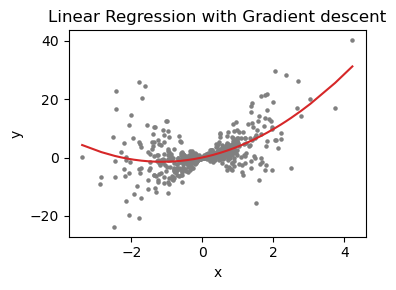

In [7]:
# Gradient descent
initθ = zeros(dims) # init variables
θgd = OLSRegGradientDescent(X, y, initθ)
ŷgd = X * θgd # predictions

# Results plot
figure(figsize=(4,3))
title("Linear Regression with Gradient descent")
scatter(x, y, color="gray", s=5) # samples
plot(x, ŷgd, color="tab:red")  # regression line
xlabel("x"); ylabel("y")
tight_layout()

### 正規方程式を用いた推定
条件に基づいて目的関数$L(\mathbf{\theta})$を微分すると次のような方程式が得られる．

$$
\mathbf{X}^\top\mathbf{X}\mathbf{\hat\theta}=\mathbf{X}^\top\mathbf{y}
$$

これを**正規方程式** (normal equation)と呼ぶ．この正規方程式より、係数の推定値は$\mathbf{\hat\theta}={(\mathbf{X}^\top\mathbf{X})}^{-1}X^\top\mathbf{y}$という式で得られる．なお，正規方程式自体は$\mathbf{y}=\mathbf{X}\mathbf{\theta}$の左から$\mathbf{X}^\top$をかける，と覚えると良い．

In [6]:
θne = (X' * X) \ X' * y
ŷne = X * θne; # predictions

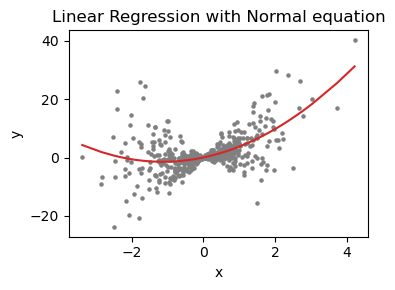

In [9]:
figure(figsize=(4,3))
title("Linear Regression with Normal equation")
scatter(x, y, color="gray", s=5) # samples
plot(x, ŷne, color="tab:red")  # regression line
xlabel("x"); ylabel("y")
tight_layout()